In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# import libraries
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import os
import numpy as np
import pandas as pd
import math, random
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('whitegrid')
from scipy import stats
import missingno as msno

# display all columns
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_row', None)

In [4]:
# load data
overlap_fp = pd.read_csv('/content/drive/MyDrive/최종프로젝트/overlap_fp_data.csv')
overlap_fn = pd.read_csv('/content/drive/MyDrive/최종프로젝트/overlap_fn_data.csv')
data = pd.read_csv('/content/drive/MyDrive/최종프로젝트/pred_binary_data.csv')

overlap_fp.drop(['Unnamed: 0'], axis=1, inplace=True)
overlap_fn.drop(['Unnamed: 0'], axis=1, inplace=True)
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
overlap_fp

pid   age  Gender  ICUType     HR    RR   SPO2    BT  MechVent    SBP  \
0   134796  90.0     0.0      4.0  101.0  19.0   97.0  37.2       1.0  116.0   
1   136972  80.0     0.0      4.0   80.0  19.0   99.0  36.9       1.0  150.0   
2   134796  90.0     0.0      4.0  101.0  19.0   97.0  37.2       1.0  116.0   
3   135200  63.0     1.0      3.0  111.0  19.0   98.0  37.3       1.0  106.0   
4   136929  54.0     1.0      4.0    0.0  19.0   97.0  40.9       1.0   34.0   
5   136972  80.0     0.0      4.0   80.0  19.0   99.0  36.9       1.0  150.0   
6   138728  77.0     1.0      3.0   76.0  19.0  100.0  37.6       1.0  104.0   
7   137656  68.0     1.0      3.0   72.0  19.0   97.0  35.3       1.0   92.0   
8   138499  88.0     1.0      3.0   99.0  19.0   97.0  36.8       1.0  116.0   
9   135291  62.0     1.0      3.0   78.0  19.0   97.0  36.8       1.0  145.0   
10  139838  56.0     0.0      4.0   83.0  19.0   97.0  37.3       1.0   93.0   
11  140116  66.0     1.0      4.0   90.0  19.0   97.0  37.7       1.0   96.0   
12  134193  89.0     1.0      3.0   71.0  12.0   97.0  35.8       1.0  116.0   

     DBP   MBP  LOS  label  
0   58.0  77.0   11      0  
1   56.0  87.0   14      0  
2   58.0  77.0   11      0  
3   71.0  80.0    8      0  
4    5.0   0.0    6      0  
5   56.0  87.0   14      0  
6   56.0  70.0   24      0  
7   47.0  61.0    2      0  
8   58.0  77.0   15      0  
9   64.0  90.0   13      0  
10  52.0  66.0   -1      0  
11  59.0  73.0    4      0  
12  58.0  77.0    3      0

In [6]:
overlap_fp.describe()

pid        age     Gender    ICUType          HR         RR  \
count      13.00000  13.000000  13.000000  13.000000   13.000000  13.000000   
mean   136922.00000  74.076923   0.615385   3.538462   80.153846  18.461538   
std      1981.36527  13.237960   0.506370   0.518875   27.199406   1.941451   
min    134193.00000  54.000000   0.000000   3.000000    0.000000  12.000000   
25%    135200.00000  63.000000   0.000000   3.000000   76.000000  19.000000   
50%    136972.00000  77.000000   1.000000   4.000000   80.000000  19.000000   
75%    138499.00000  88.000000   1.000000   4.000000   99.000000  19.000000   
max    140116.00000  90.000000   1.000000   4.000000  111.000000  19.000000   

             SPO2         BT  MechVent         SBP        DBP        MBP  \
count   13.000000  13.000000      13.0   13.000000  13.000000  13.000000   
mean    97.615385  37.207692       1.0  110.307692  53.692308  70.923077   
std      1.043908   1.297087       0.0   30.557009  15.659846  22.856296   
min     97.000000  35.300000       1.0   34.000000   5.000000   0.000000   
25%     97.000000  36.800000       1.0   96.000000  56.000000  70.000000   
50%     97.000000  37.200000       1.0  116.000000  58.000000  77.000000   
75%     98.000000  37.300000       1.0  116.000000  58.000000  80.000000   
max    100.000000  40.900000       1.0  150.000000  71.000000  90.000000   

             LOS  label  
count  13.000000   13.0  
mean    9.538462    0.0  
std     6.777603    0.0  
min    -1.000000    0.0  
25%     4.000000    0.0  
50%    11.000000    0.0  
75%    14.000000    0.0  
max    24.000000    0.0

In [7]:
overlap_fn = overlap_fn.drop_duplicates('pid')
overlap_fn.reset_index(drop=True, inplace=True)
overlap_fn

pid   age  Gender  ICUType     HR    RR  SPO2    BT  MechVent    SBP  \
0   139045  90.0     0.0      1.0   68.0  19.0  97.0  36.2       1.0  116.0   
1   133367  81.0     0.0      3.0   76.0  25.0  97.0  34.7       1.0  116.0   
2   136256  85.0     0.0      3.0   52.0  15.0  97.0  36.3       1.0  116.0   
3   136897  49.0     1.0      2.0   56.0  19.0  95.0  37.0       1.0  154.0   
4   133064  50.0     1.0      3.0   86.0  19.0  97.0  35.7       1.0  116.0   
5   135027  89.0     0.0      4.0   89.0  19.0  97.0  37.7       1.0  110.0   
6   140339  70.0     1.0      3.0   86.0  19.0  98.0  37.2       1.0  189.0   
7   139296  74.0     1.0      2.0   70.0  19.0  92.0  35.6       1.0  116.0   
8   135973  90.0     1.0      3.0  126.0  27.0  97.0  36.1       1.0  116.0   
9   134269  74.0     0.0      3.0   81.0  19.0  98.0  37.2       1.0  123.0   
10  138964  50.0     1.0      3.0   93.0  19.0  97.0  37.4       1.0  116.0   
11  133086  83.0     1.0      3.0   83.0  24.0  96.0  37.6       1.0  172.0   
12  134759  90.0     1.0      4.0   76.0  18.0  97.0  37.1       1.0  116.0   
13  138436  44.0     0.0      1.0  134.0  19.0  98.0  39.4       1.0   94.0   
14  137657  76.0     1.0      2.0  112.0  19.0  98.0  37.8       1.0  129.0   
15  140235  50.0     0.0      3.0   91.0  19.0  97.0  38.3       1.0  117.0   
16  132551  78.0     0.0      3.0   58.0  19.0  96.0  36.6       1.0  126.0   
17  133525  74.0     1.0      3.0  115.0  19.0  97.0  37.7       1.0  169.0   
18  141368  84.0     1.0      2.0   61.0  19.0  94.0  37.8       1.0  157.0   
19  139641  61.0     1.0      4.0   83.0  19.0  92.0  38.4       1.0  124.0   
20  138863  66.0     1.0      3.0  117.0  19.0  97.0  37.1       1.0  116.0   
21  140344  72.0     1.0      3.0   92.0  19.0  97.0  36.7       1.0  115.0   
22  136912  68.0     0.0      3.0  103.0  19.0  97.0  36.4       1.0  113.0   
23  135307  43.0     1.0      3.0  118.0  19.0  94.0  36.7       1.0   86.0   
24  135992  84.0     1.0      3.0   87.0  27.0  97.0  35.4       1.0  116.0   
25  135944  77.0     1.0      1.0   81.0  19.0  97.0  36.2       1.0  116.0   
26  134493  73.0     0.0      3.0   61.0  19.0  98.0  37.2       1.0    0.0   
27  140730  84.0     1.0      3.0   87.0  20.0  97.0  36.7       1.0  116.0   
28  140413  79.0     0.0      4.0   75.0  19.0  97.0  36.9       1.0  138.0   
29  142391  90.0     0.0      1.0   75.0  30.0  97.0  36.6       1.0  116.0   
30  135009  84.0     0.0      4.0  100.0  19.0  97.0  37.4       1.0  144.0   
31  133166  71.0     1.0      2.0   72.0  19.0  94.0  37.1       1.0   96.0   
32  134475  82.0     1.0      4.0   67.0  19.0  97.0  36.7       1.0  186.0   
33  138409  88.0     1.0      3.0   89.0  19.0  97.0  36.7       1.0  116.0   
34  137154  50.0     1.0      3.0   98.0  19.0  95.0  36.6       1.0   89.0   
35  135404  83.0     0.0      3.0   90.0  19.0  97.0  36.1       1.0  125.0   
36  132598  80.0     0.0      4.0   72.0  19.0  99.0  36.4       1.0  146.0   
37  133636  83.0     0.0      1.0   68.0  19.0  98.0  36.1       1.0  190.0   
38  142353  90.0     0.0      2.0  121.0  32.0  95.0  36.1       1.0  135.0   
39  133390  79.0     0.0      3.0   82.0  19.0  97.0  38.4       1.0  116.0   
40  141808  56.0     0.0      4.0  112.0  19.0  97.0  37.3       1.0  119.0   
41  139418  33.0     0.0      3.0   92.0  19.0  94.0  39.4       1.0  104.0   
42  139358  71.0     1.0      4.0   56.0  19.0  98.0  35.8       1.0  147.0   
43  139253  47.0     0.0      3.0  106.0  19.0  92.0  36.2       1.0   99.0   
44  139197  89.0     0.0      3.0   91.0  19.0  92.0  37.7       1.0   96.0   
45  138514  90.0     1.0      4.0   99.0  29.0  97.0  36.8       1.0  116.0   
46  140677  67.0     1.0      4.0  106.0  19.0  90.0  36.0       1.0   96.0   
47  135465  42.0     1.0      3.0  116.0  19.0  97.0  37.5       1.0  150.0   
48  133708  71.0     1.0      3.0  108.0  19.0  93.0  36.9       1.0   99.0   
49  132979  84.0     1.0      3.0  109.0  26.0  97.0  36.

In [8]:
overlap_fn.describe()

pid        age     Gender    ICUType          HR         RR  \
count      52.000000  52.000000  52.000000  52.000000   52.000000  52.000000   
mean   137007.903846  72.365385   0.576923   2.903846   88.961538  20.230769   
std      2905.879127  15.399298   0.498867   0.846205   20.511079   3.334992   
min    132551.000000  33.000000   0.000000   1.000000   52.000000  15.000000   
25%    134488.500000  66.750000   0.000000   3.000000   74.250000  19.000000   
50%    136904.500000  76.500000   1.000000   3.000000   88.000000  19.000000   
75%    139311.500000  84.000000   1.000000   3.000000  106.000000  19.000000   
max    142391.000000  90.000000   1.000000   4.000000  134.000000  32.000000   

            SPO2         BT  MechVent         SBP         DBP         MBP  \
count  52.000000  52.000000      52.0   52.000000   52.000000   52.000000   
mean   96.192308  36.907692       1.0  121.442308   61.884615   86.000000   
std     1.940674   0.917338       0.0   30.217132   17.500312   28.623314   
min    90.000000  34.700000       1.0    0.000000    0.000000   61.000000   
25%    95.750000  36.200000       1.0  114.500000   56.750000   75.250000   
50%    97.000000  36.800000       1.0  116.000000   58.000000   77.000000   
75%    97.000000  37.400000       1.0  130.500000   63.250000   87.250000   
max    99.000000  39.400000       1.0  190.000000  123.000000  249.000000   

             LOS  label  
count  52.000000   52.0  
mean   13.000000    1.0  
std     9.573247    0.0  
min     3.000000    1.0  
25%     6.000000    1.0  
50%    10.500000    1.0  
75%    15.250000    1.0  
max    53.000000    1.0

In [9]:
data

pid   age  Gender  ICUType   ALP   ALT   AST  Albumin   BUN  \
0    135089  90.0     1.0      3.0  85.0  45.0  72.0      2.9  20.0   
1    142245  86.0     1.0      2.0  85.0  45.0  72.0      2.9  20.0   
2    137989  63.0     0.0      3.0  85.0  45.0  72.0      2.9  20.0   
3    142184  74.0     0.0      4.0  85.0  45.0  72.0      2.9  20.0   
4    134318  48.0     1.0      3.0  85.0  45.0  72.0      2.9  20.0   
..      ...   ...     ...      ...   ...   ...   ...      ...   ...   
395  139907  39.0     0.0      4.0  85.0  45.0  72.0      2.9  20.0   
396  136230  75.0     1.0      1.0  85.0  45.0  72.0      2.9  20.0   
397  139358  71.0     1.0      4.0  85.0  45.0  72.0      2.9  20.0   
398  137755  81.0     0.0      2.0  85.0  45.0  72.0      2.9  20.0   
399  135219  78.0     0.0      4.0  85.0  45.0  72.0      2.9  11.0   

     Bilirubin  Cholesterol  Creatinine  FiO2   GCS  Glucose  HCO3   HCT  \
0          0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
1          0.8        143.5         1.0   0.5  14.0    127.0  23.0  32.9   
2          0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
3          0.8        143.5         1.0   0.5  15.0    127.0  23.0  30.4   
4          0.8        143.5         1.0   0.5  15.0    127.0  23.0  30.4   
..         ...          ...         ...   ...   ...      ...   ...   ...   
395        0.8        143.5         1.0   0.5   7.0    127.0  23.0  30.4   
396        0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
397        0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
398        0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
399        0.8        143.5         1.2   0.5  14.0    101.0  23.0  26.6   

        HR    K  Lactate   Mg     Na  PaCO2   PaO2  Platelets    RR   SPO2  \
0    106.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  24.0   97.0   
1     86.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  19.0   96.0   
2    100.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  19.0   97.0   
3    104.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  19.0   99.0   
4     95.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  11.0   97.0   
..     ...  ...      ...  ...    ...    ...    ...        ...   ...    ...   
395  128.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  19.0   97.0   
396   85.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  15.0  100.0   
397   56.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  19.0   98.0   
398   61.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  19.0   98.0   
399   66.0  4.0      2.0  1.8  133.0   40.0  118.0      118.0  18.0   98.0   

       BT  TroponinI  TroponinT  Urine   WBC    pH  MechVent    SBP   DBP  \
0    35.6        2.6       0.18   70.0  11.0  7.38       1.0  119.0  62.0   
1    37.1        2.6       0.64   75.0  11.0  7.38       1.0  116.0  58.0   
2    36.6        2.6       0.18  240.0  11.0  7.38       1.0  116.0  58.0   
3    37.0        2.6       0.18  160.0  11.0  7.38       1.0  187.0  70.0   
4    36.9        2.6       0.18   75.0  11.0  7.38       1.0  116.0  66.0   
..    ...        ...        ...    ...   ...   ...       ...    ...   ...   
395  38.1        2.6       0.18  120.0  11.0  7.38       1.0   92.0  52.0   
396  37.2        2.6       0.18   75.0  11.0  7.38       1.0  116.0  58.0   
397  35.8        2.6       0.18  120.0  11.0  7.38       1.0  147.0  88.0   
398  37.3        2.6       0.18   45.0  11.0  7.38       1.0  129.0  55.0   
399  37.7        2.6       0.18   75.0  10.6  7.38       1.0  139.0  54.0   

       MBP  LOS  ann_pred  rnn1_pred  rnn2_pred  lstm1_pred  lstm2_pred  \
0     84.0    6  0.099120   0.112077   0.204672    0.171169    0.235913   
1     77.0    7  0.005208   0.034686   0.008110    0.077271    0.062219   
2     77.0   47  0.156299   0.057729   0.166422    0.097842    0.120842   
3    117.0   37  0.073247   0.183097   0.198213    0.098188    0.244136   
4    

In [10]:
data.to_csv('/content/drive/MyDrive/최종프로젝트/pred_binary_data.csv')

In [11]:
icutype_df = data[['pid', 'ICUType', 'label']]
icutype_df

pid  ICUType  label
0    135089      3.0      0
1    142245      2.0      0
2    137989      3.0      0
3    142184      4.0      0
4    134318      3.0      0
..      ...      ...    ...
395  139907      4.0      0
396  136230      1.0      0
397  139358      4.0      1
398  137755      2.0      0
399  135219      4.0      0

[400 rows x 3 columns]

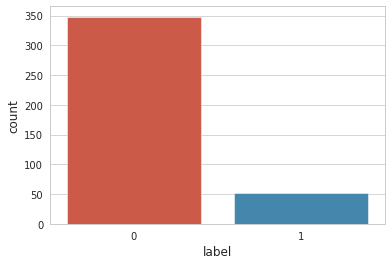

In [12]:
sns.countplot(x='label', data=icutype_df)

In [13]:
# 전체 데이터 사망 비율
print(icutype_df.label.sum()/icutype_df.label.count())

0.13


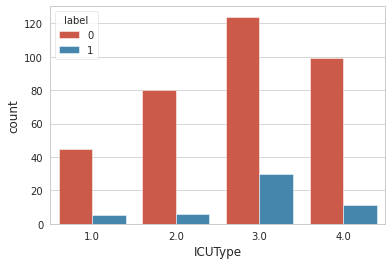

In [14]:
sns.countplot(x='ICUType', hue='label', data=icutype_df)

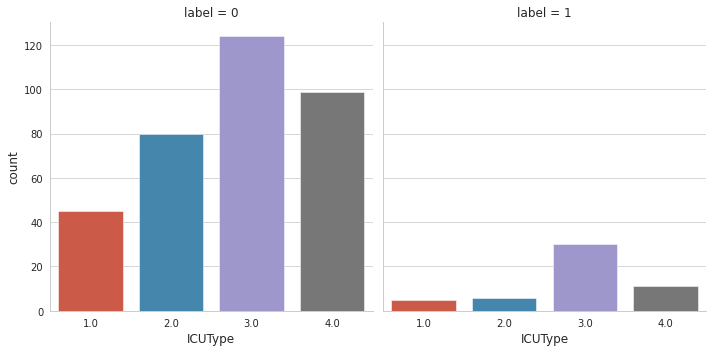

In [15]:
sns.catplot(x='ICUType', col='label', kind='count', data=icutype_df)

In [16]:
# ICUType별 사망 비율
# ICUType 3에서 사망 비율이 가장 높음 
print("% of Type1 death: " , icutype_df[icutype_df.ICUType == 1].label.sum()/icutype_df[icutype_df.ICUType == 1].label.count())
print("% of Type2 death: " , icutype_df[icutype_df.ICUType == 2].label.sum()/icutype_df[icutype_df.ICUType == 2].label.count())
print("% of Type3 death: " , icutype_df[icutype_df.ICUType == 3].label.sum()/icutype_df[icutype_df.ICUType == 3].label.count())
print("% of Type4 death: " , icutype_df[icutype_df.ICUType == 4].label.sum()/icutype_df[icutype_df.ICUType == 4].label.count())

% of Type1 death:  0.1
% of Type2 death:  0.06976744186046512
% of Type3 death:  0.19480519480519481
% of Type4 death:  0.1


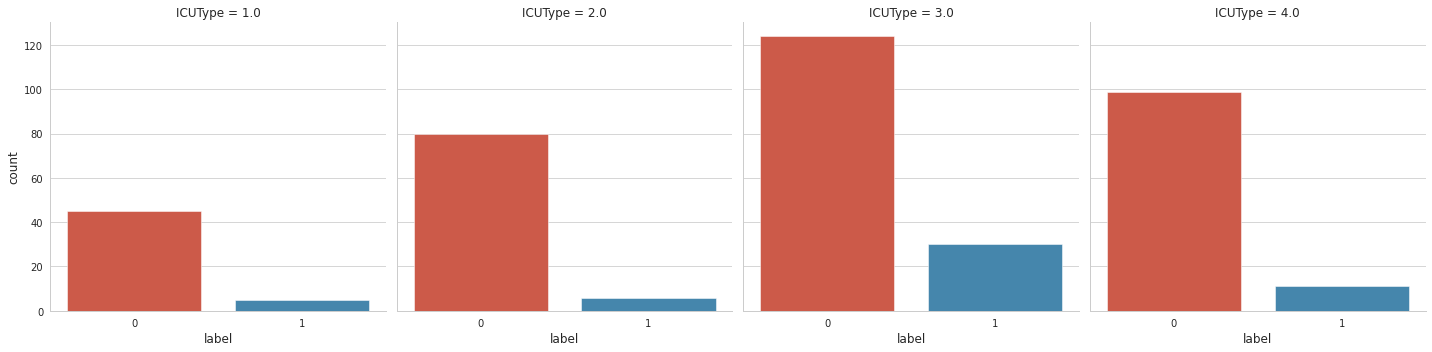

In [17]:
sns.catplot(x='label', col='ICUType', kind='count', data=icutype_df)

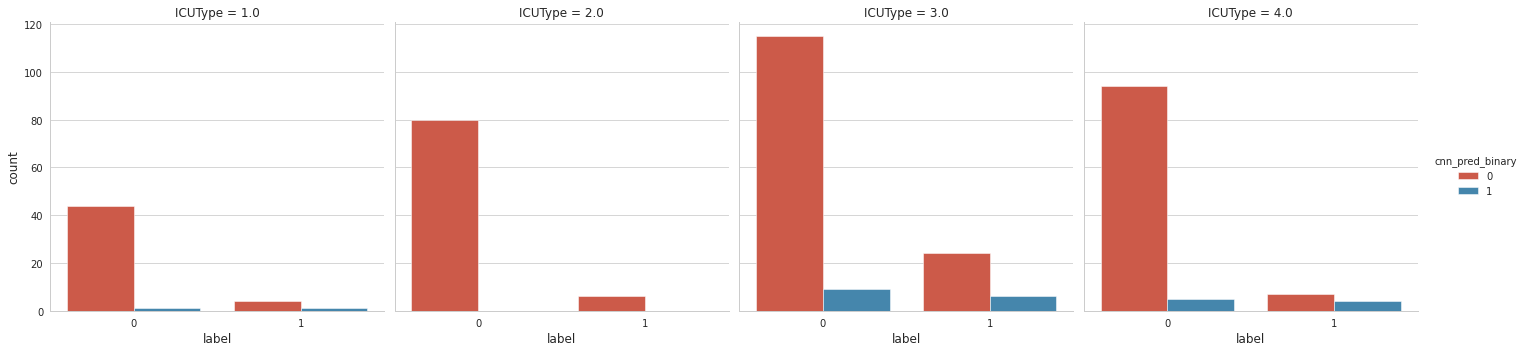

In [18]:
sns.catplot(x='label', col='ICUType', kind='count', hue='cnn_pred_binary', data=data)

In [19]:
itype1 = data[data['ICUType'] == 1]
itype2 = data[data['ICUType'] == 2]
itype3 = data[data['ICUType'] == 3]
itype4 = data[data['ICUType'] == 4] 

In [20]:
itype1.describe()

pid        age     Gender  ICUType         ALP         ALT  \
count      50.000000  50.000000  50.000000     50.0   50.000000   50.000000   
mean   137685.020000  69.440000   0.680000      1.0   85.520000   54.200000   
std      2896.799187  14.692994   0.471212      0.0    3.676955   65.053824   
min    132570.000000  38.000000   0.000000      1.0   85.000000   45.000000   
25%    135229.000000  59.000000   0.000000      1.0   85.000000   45.000000   
50%    137684.000000  73.000000   1.000000      1.0   85.000000   45.000000   
75%    139901.000000  81.000000   1.000000      1.0   85.000000   45.000000   
max    142576.000000  90.000000   1.000000      1.0  111.000000  505.000000   

              AST    Albumin        BUN  Bilirubin  Cholesterol  Creatinine  \
count   50.000000  50.000000  50.000000   50.00000         50.0    50.00000   
mean    80.940000   2.904000  21.180000    0.82800        143.5     1.02800   
std     63.215346   0.028284   9.375805    0.19799          0.0     0.22227   
min     72.000000   2.900000   6.000000    0.80000        143.5     0.50000   
25%     72.000000   2.900000  20.000000    0.80000        143.5     1.00000   
50%     72.000000   2.900000  20.000000    0.80000        143.5     1.00000   
75%     72.000000   2.900000  20.000000    0.80000        143.5     1.00000   
max    519.000000   3.100000  83.000000    2.20000        143.5     2.40000   

            FiO2        GCS     Glucose       HCO3        HCT          HR  \
count  50.000000  50.000000   50.000000  50.000000  50.000000   50.000000   
mean    0.506000  13.760000  127.000000  23.200000  30.934000   81.220000   
std     0.031364   2.055952    8.119013   0.903508   2.055516   17.265384   
min     0.500000   3.000000  103.000000  23.000000  28.000000   51.000000   
25%     0.500000  14.000000  127.000000  23.000000  30.400000   70.000000   
50%     0.500000  14.000000  127.000000  23.000000  30.400000   80.000000   
75%     0.500000  14.000000  127.000000  23.000000  30.400000   90.000000   
max     0.700000  15.000000  174.000000  29.000000  38.700000  134.000000   

              K  Lactate         Mg          Na      PaCO2        PaO2  \
count  50.00000     50.0  50.000000   50.000000  50.000000   50.000000   
mean    4.03000      2.0   2.008000  138.980000  40.640000  123.460000   
std     0.13132      0.0   0.089989    0.844913   3.095487   46.867251   
min     4.00000      2.0   1.800000  134.000000  40.000000   87.000000   
25%     4.00000      2.0   2.000000  139.000000  40.000000  118.000000   
50%     4.00000      2.0   2.000000  139.000000  40.000000  118.000000   
75%     4.00000      2.0   2.000000  139.000000  40.000000  118.000000   
max     4.80000      2.0   2.600000  142.000000  60.000000  446.000000   

        Platelets         RR        SPO2         BT  TroponinI     TroponinT  \
count   50.000000  50.000000   50.000000  50.000000       50.0  5.000000e+01   
mean   177.000000  19.800000   97.000000  36.902000        2.6  1.800000e-01   
std     27.364695   3.619674    1.498298   0.782328        0.0  2.803737e-17   
min    170.500000  10.000000   91.000000  35.600000        2.6  1.800000e-01   
25%    170.500000  19.000000   97.000000  36.400000        2.6  1.800000e-01   
50%    170.500000  19.000000   97.000000  36.800000        2.6  1.800000e-01   
75%    170.500000  20.500000   98.000000  37.200000        2.6  1.800000e-01   
max    341.000000  30.000000  100.000000  39.400000        2.6  1.800000e-01   

           Urine        WBC         pH  MechVent       SBP        DBP  \
count   50.00000  50.000000  50.000000      50.0   50.0000  50.000000   
mean   116.06000  11.208000   7.377000       1.0  117.6600  61.800000   
std    131.88839   0.979554   0.013132       0.0   15.5414  10.111622   
min      0.00000  10.100000   7.300000       1.0   87.0000  34.000000   
25%     75.00000  11.000000   7.380000       1.0  116.0000  58.000000   
50%     75.00000  11.000000   7.380000       1.0  116.0000  58.000000   


In [21]:
# cnn 모델 제외 모두 type1 생존으로 예측 

In [22]:
itype2.describe()

pid        age     Gender  ICUType        ALP        ALT  \
count      86.000000  86.000000  86.000000     86.0  86.000000  86.000000   
mean   137875.476744  67.500000   0.627907      2.0  84.674419  44.744186   
std      2567.319237  13.554899   0.486198      0.0   3.019318   2.372321   
min    132567.000000  20.000000   0.000000      2.0  57.000000  23.000000   
25%    136065.750000  60.250000   0.000000      2.0  85.000000  45.000000   
50%    137853.500000  71.000000   1.000000      2.0  85.000000  45.000000   
75%    139565.000000  77.000000   1.000000      2.0  85.000000  45.000000   
max    142353.000000  90.000000   1.000000      2.0  85.000000  45.000000   

             AST  Albumin        BUN  Bilirubin  Cholesterol  Creatinine  \
count  86.000000     86.0  86.000000  86.000000         86.0   86.000000   
mean   71.430233      2.9  19.860465   0.794186        143.5    1.012791   
std     5.283806      0.0   2.296610   0.053916          0.0    0.189610   
min    23.000000      2.9   5.000000   0.300000        143.5    0.700000   
25%    72.000000      2.9  20.000000   0.800000        143.5    1.000000   
50%    72.000000      2.9  20.000000   0.800000        143.5    1.000000   
75%    72.000000      2.9  20.000000   0.800000        143.5    1.000000   
max    72.000000      2.9  32.000000   0.800000        143.5    2.700000   

            FiO2        GCS     Glucose       HCO3        HCT          HR  \
count  86.000000  86.000000   86.000000  86.000000  86.000000   86.000000   
mean    0.498837  13.906977  127.290698  23.011628  30.339535   84.255814   
std     0.018750   1.342762    4.208860   0.583986   0.875991   15.381567   
min     0.400000   3.000000  115.000000  19.000000  22.700000   47.000000   
25%     0.500000  14.000000  127.000000  23.000000  30.400000   72.500000   
50%     0.500000  14.000000  127.000000  23.000000  30.400000   83.000000   
75%     0.500000  14.000000  127.000000  23.000000  30.400000   90.750000   
max     0.600000  15.000000  164.000000  26.000000  32.900000  137.000000   

               K    Lactate         Mg          Na      PaCO2        PaO2  \
count  86.000000  86.000000  86.000000   86.000000  86.000000   86.000000   
mean    4.000000   2.037209   2.003488  139.174419  40.302326  119.058140   
std     0.015339   0.403236   0.132352    1.729957   2.739986   37.786196   
min     3.900000   1.500000   1.300000  138.000000  32.000000   60.000000   
25%     4.000000   2.000000   2.000000  139.000000  40.000000  118.000000   
50%     4.000000   2.000000   2.000000  139.000000  40.000000  118.000000   
75%     4.000000   2.000000   2.000000  139.000000  40.000000  118.000000   
max     4.100000   5.700000   3.000000  155.000000  62.000000  449.000000   

        Platelets         RR        SPO2         BT  TroponinI  TroponinT  \
count   86.000000  86.000000   86.000000  86.000000       86.0  86.000000   
mean   168.831395  19.174419   96.406977  37.169767        2.6   0.185349   
std     15.474003   1.736744    2.343341   0.662983        0.0   0.049603   
min     27.000000  13.000000   86.000000  35.600000        2.6   0.180000   
25%    170.500000  19.000000   96.000000  36.800000        2.6   0.180000   
50%    170.500000  19.000000   97.000000  37.200000        2.6   0.180000   
75%    170.500000  19.000000   98.000000  37.575000        2.6   0.180000   
max    170.500000  32.000000  100.000000  39.000000        2.6   0.640000   

            Urine        WBC         pH  MechVent         SBP        DBP  \
count   86.000000  86.000000  86.000000      86.0   86.000000  86.000000   
mean    83.453488  10.987209   7.380233       1.0  119.220930  58.313953   
std     57.546842   0.118616   0.020579       0.0   24.206174  12.234245   
min     12.000000   9.900000   7.220000       1.0    0.000000   0.000000   
25%     45.000000  11.000000   7.380000       1.0  103.750000  52.250000   
50%     75.000000  11.000000   7.380000       1.0  118.500000  58.000000   
75%     80.000000  11.00

In [23]:
# gru 모델 제외 모두 type2 생존으로 예측 

In [24]:
itype3.describe()

pid         age      Gender  ICUType         ALP         ALT  \
count     154.000000  154.000000  154.000000    154.0  154.000000  154.000000   
mean   137230.448052   63.616883    0.545455      3.0   86.038961   44.811688   
std      2973.116096   19.432201    0.499554      0.0   12.893167    2.336887   
min    132551.000000   18.000000    0.000000      3.0   85.000000   16.000000   
25%    134681.500000   50.000000    0.000000      3.0   85.000000   45.000000   
50%    136947.000000   68.000000    1.000000      3.0   85.000000   45.000000   
75%    139471.000000   79.000000    1.000000      3.0   85.000000   45.000000   
max    142595.000000   90.000000    1.000000      3.0  245.000000   45.000000   

              AST     Albumin         BUN   Bilirubin  Cholesterol  \
count  154.000000  154.000000  154.000000  154.000000        154.0   
mean    71.636364    2.904545   20.668831    0.801299        143.5   
std      4.512609    0.040165    6.823695    0.016116          0.0   
min     16.000000    2.900000    5.000000    0.800000        143.5   
25%     72.000000    2.900000   20.000000    0.800000        143.5   
50%     72.000000    2.900000   20.000000    0.800000        143.5   
75%     72.000000    2.900000   20.000000    0.800000        143.5   
max     72.000000    3.300000   71.000000    1.000000        143.5   

       Creatinine        FiO2         GCS     Glucose        HCO3         HCT  \
count  154.000000  154.000000  154.000000  154.000000  154.000000  154.000000   
mean     1.005195    0.499351   13.681818  127.454545   23.155844   30.296753   
std      0.201884    0.053010    1.762739   15.186893    1.048683    1.015528   
min      0.400000    0.300000    3.000000   58.000000   21.000000   22.200000   
25%      1.000000    0.500000   14.000000  127.000000   23.000000   30.400000   
50%      1.000000    0.500000   14.000000  127.000000   23.000000   30.400000   
75%      1.000000    0.500000   14.000000  127.000000   23.000000   30.400000   
max      2.700000    1.000000   15.000000  245.000000   33.000000   36.300000   

               HR           K     Lactate          Mg          Na       PaCO2  \
count  154.000000  154.000000  154.000000  154.000000  154.000000  154.000000   
mean    86.435065    3.993506    2.003896    1.998052  139.220779   39.863636   
std     18.977429    0.136087    0.141367    0.074510    1.227393    2.260974   
min      0.000000    3.300000    1.100000    1.500000  135.000000   26.000000   
25%     75.000000    4.000000    2.000000    2.000000  139.000000   40.000000   
50%     86.000000    4.000000    2.000000    2.000000  139.000000   40.000000   
75%     98.000000    4.000000    2.000000    2.000000  139.000000   40.000000   
max    135.000000    4.800000    3.500000    2.500000  147.000000   54.000000   

             PaO2   Platelets          RR        SPO2          BT  TroponinI  \
count  154.000000  154.000000  154.000000  154.000000  154.000000      154.0   
mean   118.987013  172.724026   19.396104   96.558442   36.885065        2.6   
std     10.160147   25.141953    3.200120    2.300858    0.765240        0.0   
min     86.000000   23.000000   11.000000   76.000000   34.700000        2.6   
25%    118.000000  170.500000   19.000000   97.000000   36.400000        2.6   
50%    118.000000  170.500000   19.000000   97.000000   36.900000        2.6   
75%    118.000000  170.500000   19.000000   97.000000   37.300000        2.6   
max    216.000000  373.000000   41.000000  100.000000   39.400000        2.6   

          TroponinT       Urine         WBC          pH  MechVent         SBP  \
count  1.540000e+02  154.000000  154.000000  154.000000     154.0  154.000000   
mean   1.800000e-01   99.720779   10.874026    7.379805       1.0  118.220779   
std    5.569226e-17   97.224052    1.125974    0.009251       0.0   25.045122   
min    1.800000e-01    0.000000    0.400000    7.310000       1.0    0.000000   
25%    1.800000e-01   75.000000   11.000000    7.380000       1.0  116

In [25]:
itype4.describe()

pid         age      Gender  ICUType    ALP    ALT    AST  \
count     110.000000  110.000000  110.000000    110.0  110.0  110.0  110.0   
mean   137954.354545   60.036364    0.527273      4.0   85.0   45.0   72.0   
std      3132.449282   20.210329    0.501541      0.0    0.0    0.0    0.0   
min    132598.000000   17.000000    0.000000      4.0   85.0   45.0   72.0   
25%    134768.250000   47.000000    0.000000      4.0   85.0   45.0   72.0   
50%    138450.500000   63.000000    1.000000      4.0   85.0   45.0   72.0   
75%    140746.500000   77.750000    1.000000      4.0   85.0   45.0   72.0   
max    142641.000000   90.000000    1.000000      4.0   85.0   45.0   72.0   

            Albumin         BUN     Bilirubin  Cholesterol  Creatinine  \
count  1.100000e+02  110.000000  1.100000e+02        110.0  110.000000   
mean   2.900000e+00   19.845455  8.000000e-01        143.5    1.006364   
std    1.784487e-15    2.716536  2.230608e-16          0.0    0.103407   
min    2.900000e+00    6.000000  8.000000e-01        143.5    0.700000   
25%    2.900000e+00   20.000000  8.000000e-01        143.5    1.000000   
50%    2.900000e+00   20.000000  8.000000e-01        143.5    1.000000   
75%    2.900000e+00   20.000000  8.000000e-01        143.5    1.000000   
max    2.900000e+00   39.000000  8.000000e-01        143.5    2.000000   

             FiO2         GCS     Glucose        HCO3         HCT          HR  \
count  110.000000  110.000000  110.000000  110.000000  110.000000  110.000000   
mean     0.499091   13.081818  126.872727   23.090909   30.418182   82.854545   
std      0.045927    2.472349    3.256917    0.830004    0.807895   18.468340   
min      0.300000    3.000000  101.000000   21.000000   26.600000    0.000000   
25%      0.500000   14.000000  127.000000   23.000000   30.400000   70.250000   
50%      0.500000   14.000000  127.000000   23.000000   30.400000   81.000000   
75%      0.500000   14.000000  127.000000   23.000000   30.400000   94.750000   
max      0.800000   15.000000  147.000000   29.000000   37.600000  129.000000   

                K     Lactate          Mg          Na       PaCO2        PaO2  \
count  110.000000  110.000000  110.000000  110.000000  110.000000  110.000000   
mean     3.991818    1.998182    1.993636  138.963636   40.063636  118.318182   
std      0.073111    0.019069    0.033938    0.676300    0.667424    3.337119   
min      3.300000    1.800000    1.800000  133.000000   40.000000  118.000000   
25%      4.000000    2.000000    2.000000  139.000000   40.000000  118.000000   
50%      4.000000    2.000000    2.000000  139.000000   40.000000  118.000000   
75%      4.000000    2.000000    2.000000  139.000000   40.000000  118.000000   
max      4.100000    2.000000    2.000000  142.000000   47.000000  153.000000   

        Platelets          RR        SPO2          BT     TroponinI  \
count  110.000000  110.000000  110.000000  110.000000  1.100000e+02   
mean   169.950000   19.409091   97.027273   37.180909  2.600000e+00   
std     11.598788    5.406920    1.128928    0.717091  1.338365e-15   
min    110.000000    9.000000   90.000000   35.600000  2.600000e+00   
25%    170.500000   19.000000   97.000000   36.800000  2.600000e+00   
50%    170.500000   19.000000   97.000000   37.200000  2.600000e+00   
75%    170.500000   19.000000   97.000000   37.500000  2.600000e+00   
max    233.000000   69.000000   99.000000   40.900000  2.600000e+00   

        TroponinT       Urine         WBC          pH  MechVent         SBP  \
count  110.000000  110.000000  110.000000  110.000000     110.0  110.000000   
mean     0.179818  116.736364   11.130000    7.380273       1.0  126.281818   
std      0.001907  107.208849    0.937452    0.002860       0.0   22.462663   
min      0.160000   12.000000   10.600000    7.380000       1.0   34.000000   
25%      0.180000   75.000000   11.000000    7.380000       1.0  116.000000   
50%      0.180000   75.000000   11.000000    7.380000       1.0  121.5000

In [26]:
# lstm은 type 1, 2, 3, 4 모두 생존으로 예측..?
# func는 type3제외 모두 생존으로 예측..
# type 3, 4에서 대부분 모델이 사망 예측 조금씩... 늘어남남

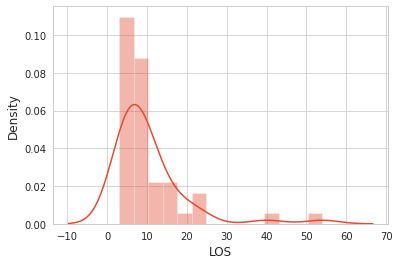

In [27]:
sns.distplot(itype1['LOS'])

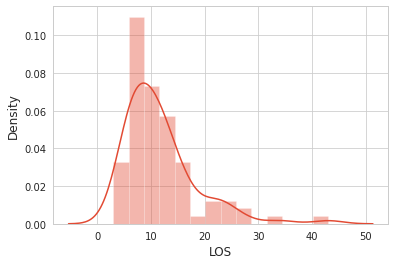

In [28]:
sns.distplot(itype2['LOS'])

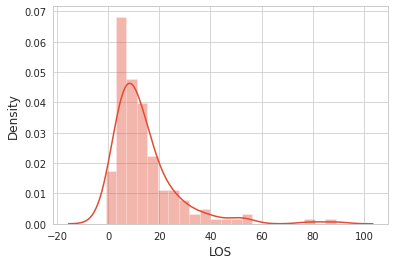

In [29]:
sns.distplot(itype3['LOS'])

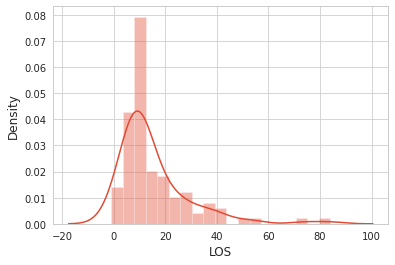

In [30]:
sns.distplot(itype4['LOS'])

In [31]:
test_data = pd.read_csv('/content/drive/MyDrive/최종프로젝트/preprocessed_test_data.csv')
test_data.drop(['Unnamed: 0'], axis=1, inplace=True)
test_data

pid   age  Gender  ICUType   ALP   ALT   AST  Albumin   BUN  \
0      135089  90.0     1.0      3.0   0.0   0.0   0.0      0.0   0.0   
1      135089  90.0     1.0      3.0   0.0   0.0   0.0      0.0   0.0   
2      135089  90.0     1.0      3.0   0.0   0.0   0.0      0.0   0.0   
3      135089  90.0     1.0      3.0   0.0   0.0   0.0      0.0   0.0   
4      135089  90.0     1.0      3.0   0.0   0.0   0.0      0.0   0.0   
...       ...   ...     ...      ...   ...   ...   ...      ...   ...   
27995  135219  78.0     0.0      4.0  85.0  45.0  72.0      2.9  20.0   
27996  135219  78.0     0.0      4.0  85.0  45.0  72.0      2.9  20.0   
27997  135219  78.0     0.0      4.0  85.0  45.0  72.0      2.9  20.0   
27998  135219  78.0     0.0      4.0  85.0  45.0  72.0      2.9  20.0   
27999  135219  78.0     0.0      4.0  85.0  45.0  72.0      2.9  11.0   

       Bilirubin  Cholesterol  Creatinine  FiO2   GCS  Glucose  HCO3   HCT  \
0            0.0          0.0         0.0   0.0   0.0      0.0   0.0   0.0   
1            0.0          0.0         0.0   0.0   0.0      0.0   0.0   0.0   
2            0.0          0.0         0.0   0.0   0.0      0.0   0.0   0.0   
3            0.0          0.0         0.0   0.0   0.0      0.0   0.0   0.0   
4            0.0          0.0         0.0   0.0   0.0      0.0   0.0   0.0   
...          ...          ...         ...   ...   ...      ...   ...   ...   
27995        0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
27996        0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
27997        0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
27998        0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
27999        0.8        143.5         1.2   0.5  14.0    101.0  23.0  26.6   

         HR    K  Lactate   Mg     Na  PaCO2   PaO2  Platelets    RR  SPO2  \
0       0.0  0.0      0.0  0.0    0.0    0.0    0.0        0.0   0.0   0.0   
1       0.0  0.0      0.0  0.0    0.0    0.0    0.0        0.0   0.0   0.0   
2       0.0  0.0      0.0  0.0    0.0    0.0    0.0        0.0   0.0   0.0   
3       0.0  0.0      0.0  0.0    0.0    0.0    0.0        0.0   0.0   0.0   
4       0.0  0.0      0.0  0.0    0.0    0.0    0.0        0.0   0.0   0.0   
...     ...  ...      ...  ...    ...    ...    ...        ...   ...   ...   
27995  59.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  22.0  98.0   
27996  60.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  22.0  98.0   
27997  66.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  18.0  98.0   
27998  66.0  4.0      2.0  2.0  139.0   40.0   90.0      170.5  18.0  98.0   
27999  66.0  4.0      2.0  1.8  133.0   40.0  118.0      118.0  18.0  98.0   

         BT  TroponinI  TroponinT  Urine   WBC    pH  MechVent    SBP   DBP  \
0       0.0        0.0       0.00    0.0   0.0  0.00       0.0    0.0   0.0   
1       0.0        0.0       0.00    0.0   0.0  0.00       0.0    0.0   0.0   
2       0.0        0.0       0.00    0.0   0.0  0.00       0.0    0.0   0.0   
3       0.0        0.0       0.00    0.0   0.0  0.00       0.0    0.0   0.0   
4       0.0        0.0       0.00    0.0   0.0  0.00       0.0    0.0   0.0   
...     ...        ...        ...    ...   ...   ...       ...    ...   ...   
27995  37.6        2.6       0.18   35.0  11.0  7.38       1.0  134.0  51.0   
27996  37.6        2.6       0.18   75.0  11.0  7.38       1.0  132.0  50.0   
27997  37.7        2.6       0.18   45.0  11.0  7.38       1.0  139.0  54.0   
27998  37.7        2.6       0.18   75.0  11.0  7.37       1.0  139.0  54.0   
27999  37.7        2.6       0.18   75.0  10.6  7.38       1.0  139.0  54.0   

        MBP  LOS  label  
0       0.0    0      0  
1       0.0    0      0  
2       0.0    0      0  
3       0.0    0      0  
4       0.0    0      0  
...     ...  ...    ...  
27995  79.0    9      0  
27996  78.0    9      0  
27997  84.0    9      0  
27998  84.0    9      0  
27999  84.0    9      0 

In [32]:
essential_test_df = test_data[['pid', 'age', 'Gender', 'ICUType', 'HR', 'RR', 'SPO2', 'BT', 'MechVent', 'SBP', 'DBP', 'MBP', 'LOS', 'label']]
essential_test_df

pid   age  Gender  ICUType    HR    RR  SPO2    BT  MechVent    SBP  \
0      135089  90.0     1.0      3.0   0.0   0.0   0.0   0.0       0.0    0.0   
1      135089  90.0     1.0      3.0   0.0   0.0   0.0   0.0       0.0    0.0   
2      135089  90.0     1.0      3.0   0.0   0.0   0.0   0.0       0.0    0.0   
3      135089  90.0     1.0      3.0   0.0   0.0   0.0   0.0       0.0    0.0   
4      135089  90.0     1.0      3.0   0.0   0.0   0.0   0.0       0.0    0.0   
...       ...   ...     ...      ...   ...   ...   ...   ...       ...    ...   
27995  135219  78.0     0.0      4.0  59.0  22.0  98.0  37.6       1.0  134.0   
27996  135219  78.0     0.0      4.0  60.0  22.0  98.0  37.6       1.0  132.0   
27997  135219  78.0     0.0      4.0  66.0  18.0  98.0  37.7       1.0  139.0   
27998  135219  78.0     0.0      4.0  66.0  18.0  98.0  37.7       1.0  139.0   
27999  135219  78.0     0.0      4.0  66.0  18.0  98.0  37.7       1.0  139.0   

        DBP   MBP  LOS  label  
0       0.0   0.0    0      0  
1       0.0   0.0    0      0  
2       0.0   0.0    0      0  
3       0.0   0.0    0      0  
4       0.0   0.0    0      0  
...     ...   ...  ...    ...  
27995  51.0  79.0    9      0  
27996  50.0  78.0    9      0  
27997  54.0  84.0    9      0  
27998  54.0  84.0    9      0  
27999  54.0  84.0    9      0  

[28000 rows x 14 columns]

In [33]:
overlap_fp

pid   age  Gender  ICUType     HR    RR   SPO2    BT  MechVent    SBP  \
0   134796  90.0     0.0      4.0  101.0  19.0   97.0  37.2       1.0  116.0   
1   136972  80.0     0.0      4.0   80.0  19.0   99.0  36.9       1.0  150.0   
2   134796  90.0     0.0      4.0  101.0  19.0   97.0  37.2       1.0  116.0   
3   135200  63.0     1.0      3.0  111.0  19.0   98.0  37.3       1.0  106.0   
4   136929  54.0     1.0      4.0    0.0  19.0   97.0  40.9       1.0   34.0   
5   136972  80.0     0.0      4.0   80.0  19.0   99.0  36.9       1.0  150.0   
6   138728  77.0     1.0      3.0   76.0  19.0  100.0  37.6       1.0  104.0   
7   137656  68.0     1.0      3.0   72.0  19.0   97.0  35.3       1.0   92.0   
8   138499  88.0     1.0      3.0   99.0  19.0   97.0  36.8       1.0  116.0   
9   135291  62.0     1.0      3.0   78.0  19.0   97.0  36.8       1.0  145.0   
10  139838  56.0     0.0      4.0   83.0  19.0   97.0  37.3       1.0   93.0   
11  140116  66.0     1.0      4.0   90.0  19.0   97.0  37.7       1.0   96.0   
12  134193  89.0     1.0      3.0   71.0  12.0   97.0  35.8       1.0  116.0   

     DBP   MBP  LOS  label  
0   58.0  77.0   11      0  
1   56.0  87.0   14      0  
2   58.0  77.0   11      0  
3   71.0  80.0    8      0  
4    5.0   0.0    6      0  
5   56.0  87.0   14      0  
6   56.0  70.0   24      0  
7   47.0  61.0    2      0  
8   58.0  77.0   15      0  
9   64.0  90.0   13      0  
10  52.0  66.0   -1      0  
11  59.0  73.0    4      0  
12  58.0  77.0    3      0

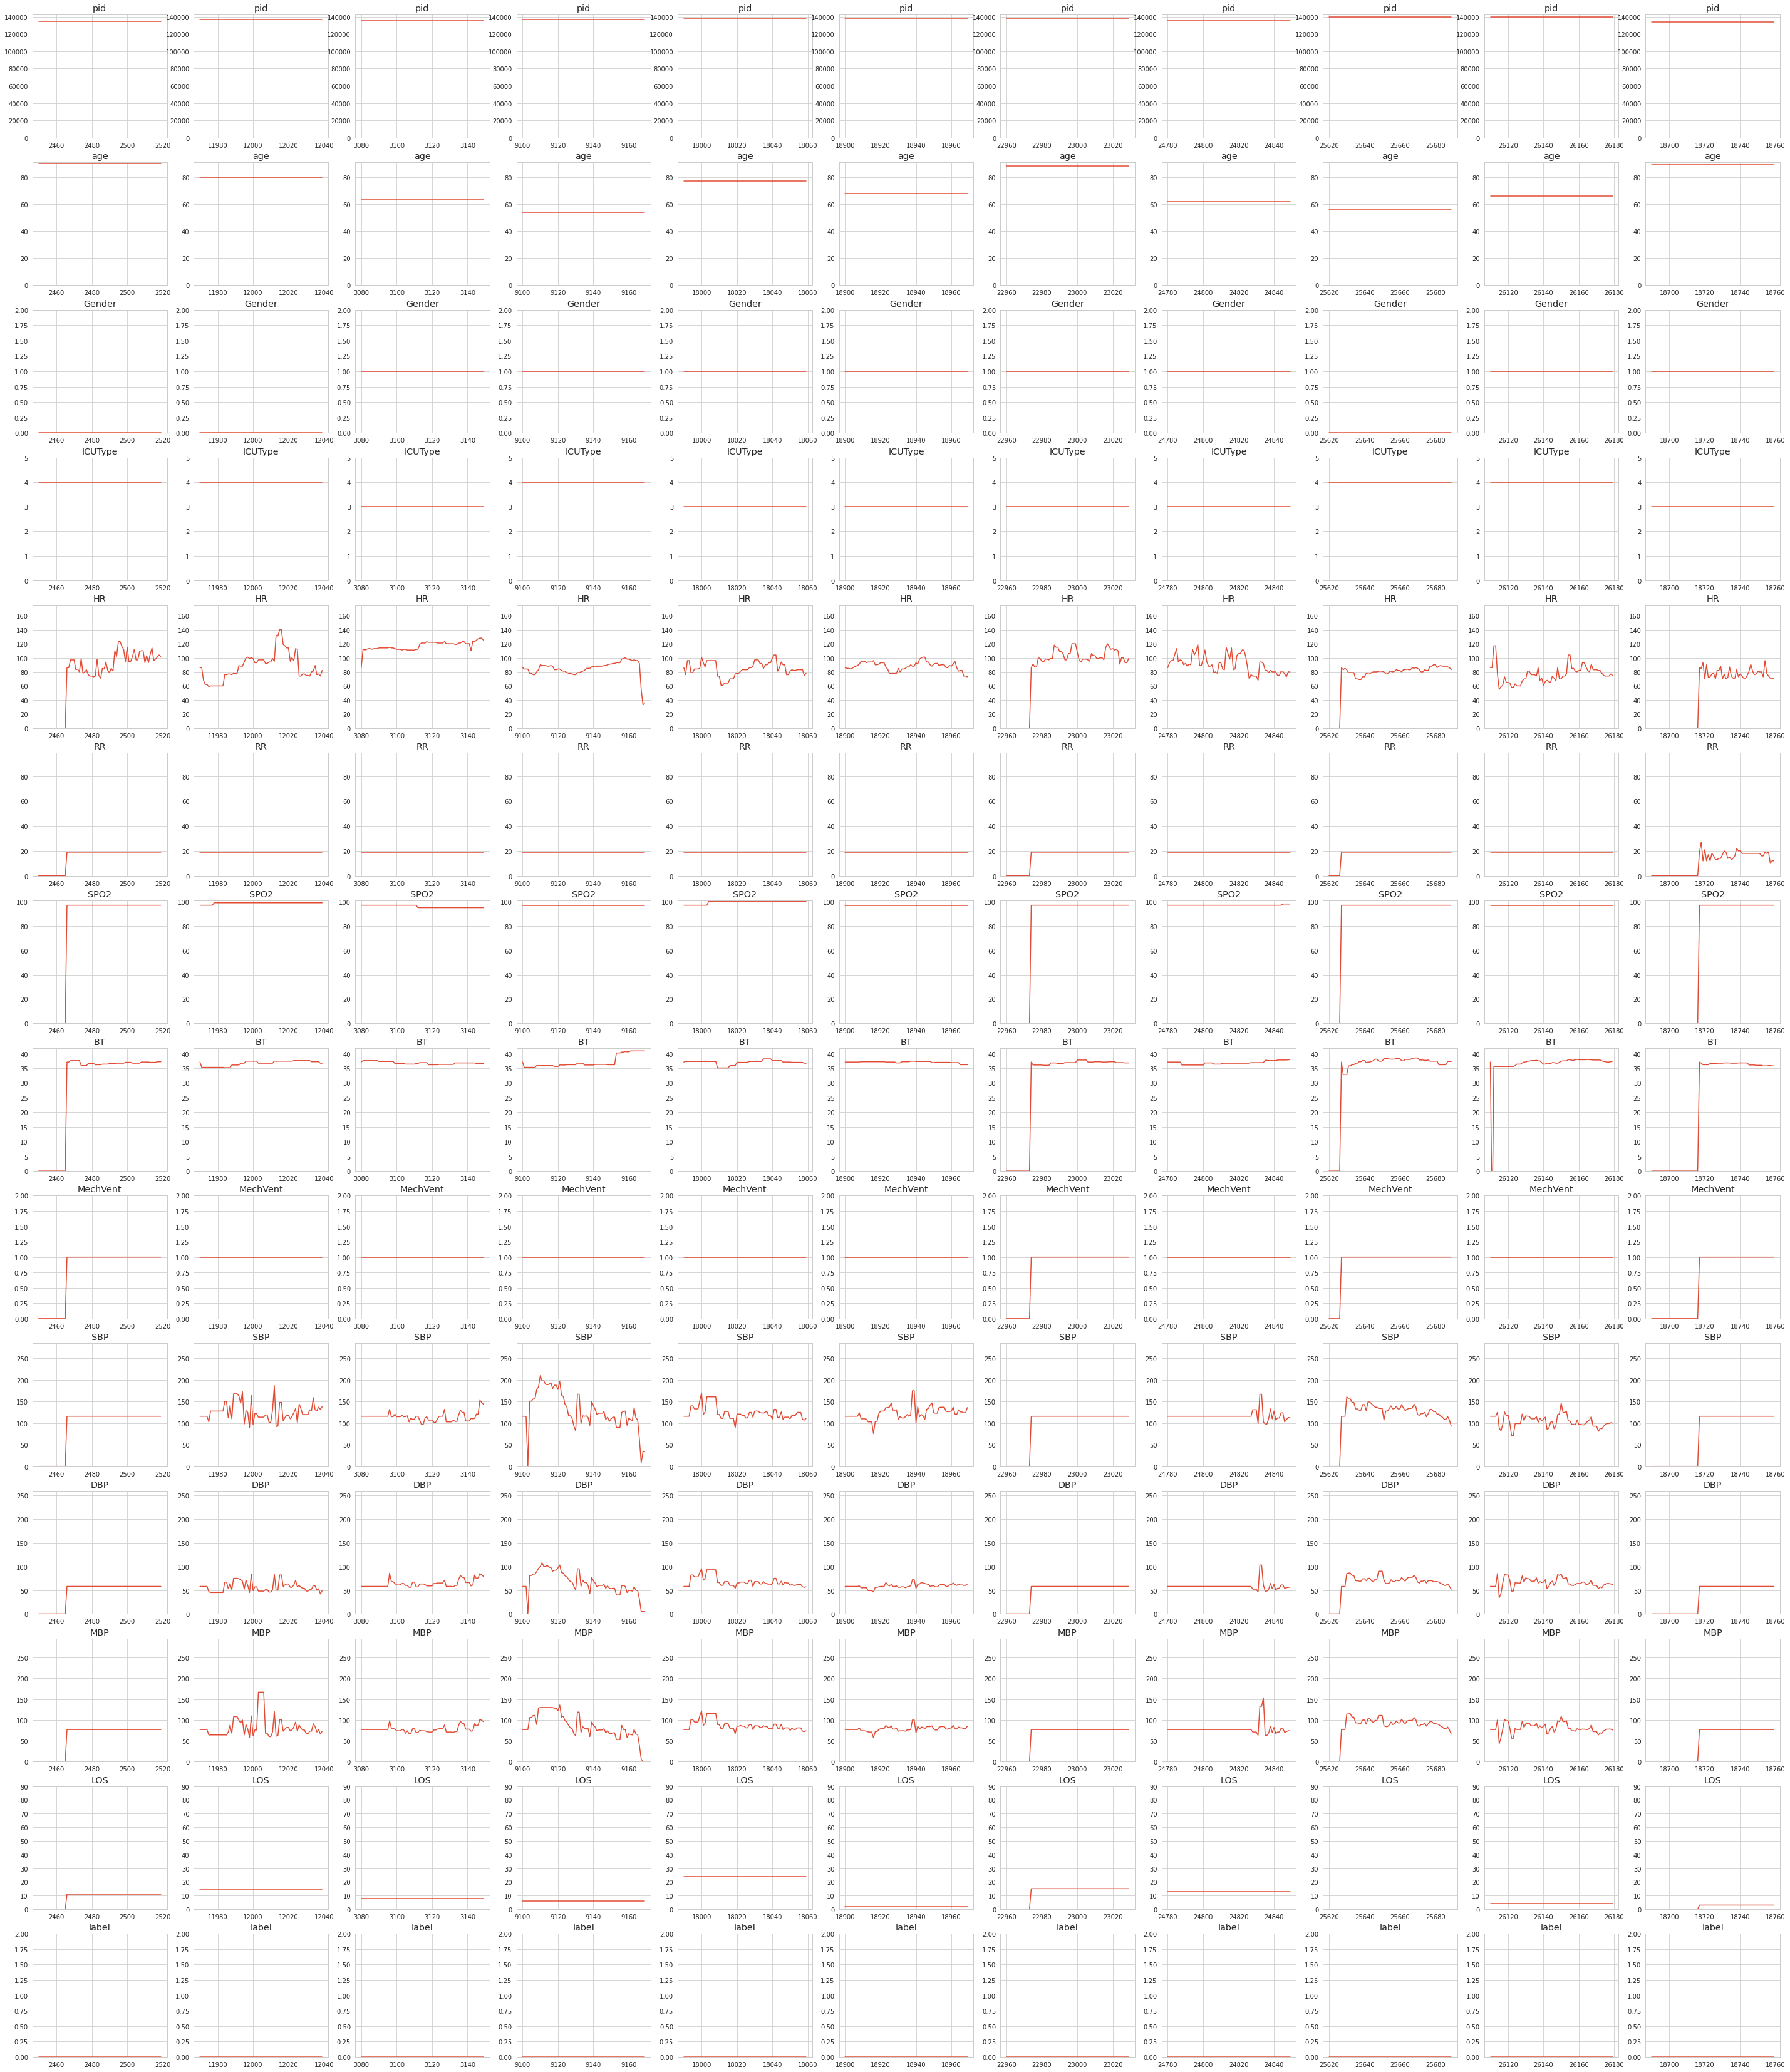

In [38]:
fig, axes = plt.subplots(nrows=14, ncols=11, figsize=(50, 60))

for coln, p in enumerate(overlap_fp['pid'].unique()):
    for rown, col in enumerate(essential_test_df.columns):
        ax = axes[rown][coln]
        ax.set_ylim(0, essential_test_df[col].max()+1)
        ax.set_title(col)
        ax.plot(essential_test_df[essential_test_df['pid'] == p][col])